<a href="https://colab.research.google.com/github/AndreassOlsson/FastAI/blob/main/creating_gradio-demos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building the model

In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.IMAGENETTE)
path.ls()

In [ ]:
label_dict = dict(
    n01440764='tench',
    n02102040='English springer',
    n02979186='cassette player',
    n03000684='chain saw',
    n03028079='church',
    n03394916='French horn',
    n03417042='garbage truck',
    n03425413='gas pump',
    n03445777='golf ball',
    n03888257='parachute'
)
def label_func(path): return label_dict[parent_label(path)]

In [ ]:
label_func(
  (path/'train/n03445777').ls()[0]  
)

'golf ball'

In [ ]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = label_func,
    item_tfms = Resize(460),
    batch_tfms = aug_transforms(size=224)
).dataloaders(path, bs=9)

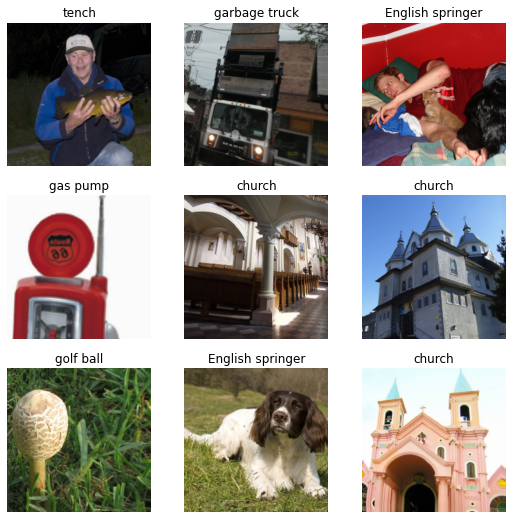

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(valley=0.0008317637839354575)

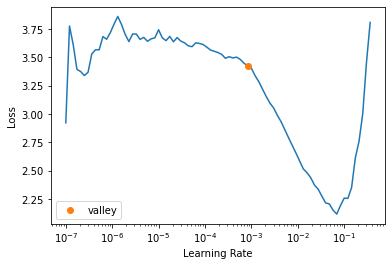

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(5, 8.3e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.291744,0.039912,0.011576,02:45


epoch,train_loss,valid_loss,error_rate,time
0,0.252396,0.040895,0.013069,02:53
1,0.228860,0.085615,0.028006,02:51
2,0.129058,0.065797,0.020164,02:48
3,0.072307,0.045163,0.014937,02:49
4,0.056967,0.042104,0.013816,02:49


In [ ]:
learn.export('model.pkl')

# Building the demo

Note that the following example wont work for exporting the code to a script since the environment is not set up correctly. However, the gradio interface on localhost will still work from these cells.

In [ ]:
#|default_exp app

In [ ]:
!pip install gradio

In [ ]:
#|export
from fastai.vision.all import *
import gradio as gr

In [ ]:
#|export
label_dict = dict(
    n01440764='tench',
    n02102040='English springer',
    n02979186='cassette player',
    n03000684='chain saw',
    n03028079='church',
    n03394916='French horn',
    n03417042='garbage truck',
    n03425413='gas pump',
    n03445777='golf ball',
    n03888257='parachute'
)
def label_func(path): return label_dict[parent_label(path)]

learn = load_learner('model.pkl')

In [ ]:
#|export

def classify_func(image):
  pred, idx, prob = learn.predict(image)
  return {pred: prob[idx].item()}

In [ ]:
classify_func('chainsaw.jpg')

{'chain saw': 0.9999996423721313}

In [ ]:
#|export
image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label()
examples=['ball.jpg', 'tench.jpeg', 'chainsaw.jpg']

intf = gr.Interface(fn=classify_func, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

In [ ]:
from nbdev.export import notebook2script

In [ ]:
notebook2script('app.ipynb')